# 목적 : 리뷰로부터 인사이트를 얻고, 감성분석을 해본다

# DATA OVERVIEW

- 데이터셋은 아마존의 알렉사 제품에 대한, 3000개의 리뷰로 되어있습니다.
- 컬럼은 rating,	date,	variation(제품모델),	verified_reviews,	feedback
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews


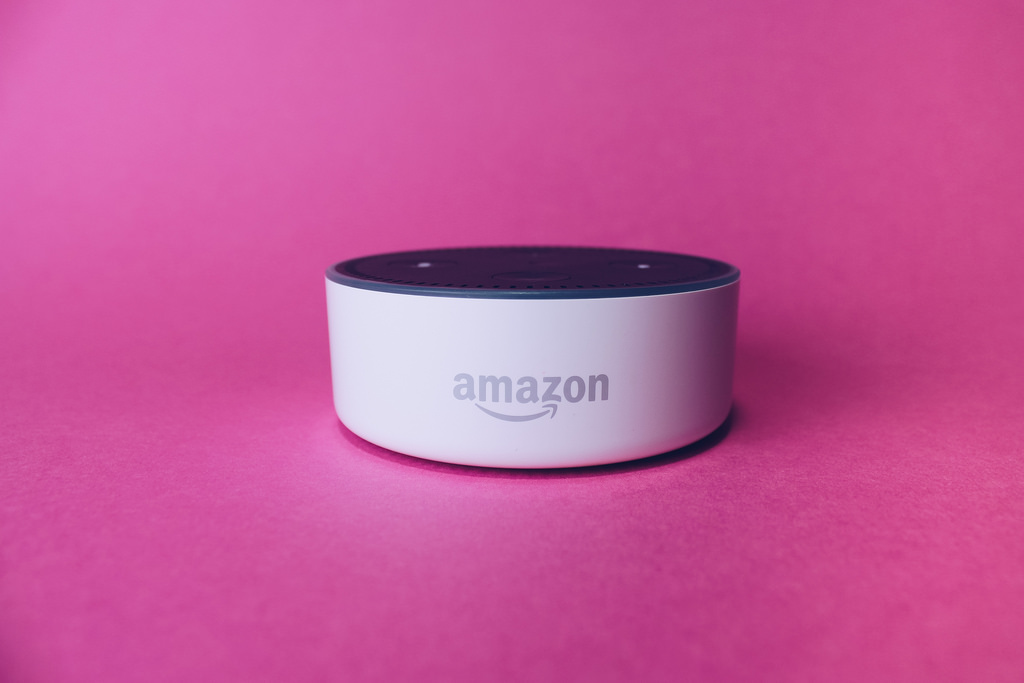

# 실습 1. 패키지 설치

프로젝트를 위해, 아나콘다 프롬프트를 실행하고, 다음을 인스톨 하세요.

conda install -c conda-forge wordcloud

## IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sb # Statistical data visualization
%matplotlib inline

# 실습 2. pandas로 파일 읽기 - 탭으로 되어 있는 tsv 파일 읽기

tsv파일 읽기. pd.read_csv('file.tsv', sep='\t')

In [2]:
#tsv 파일은 comma가 아닌 tab으로 구분이 되어 있는 파일이다
df = pd.read_csv('amazon_alexa.tsv', sep='\t')


# 실습 3. verified_reviews 컬럼의 내용이 어떤지 확인해 보세요

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df['verified_reviews'][0]

'Love my Echo!'

In [5]:
df['verified_reviews'][2]

'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'

In [6]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


# 실습 4. 피드백은 0과 1로 되어있습니다. 1은 긍정, 0은 부정입니다.  긍정 리뷰와 부정리뷰의 갯수를 그래프로 나타내세요.

In [7]:
df.head(1)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1


In [8]:
#긍정리뷰
df.loc[ df['feedback'] == 1, 'feedback'].value_counts()

1    2893
Name: feedback, dtype: int64

sb.countplot(x=컬럼) 카운트해서 차트그리기

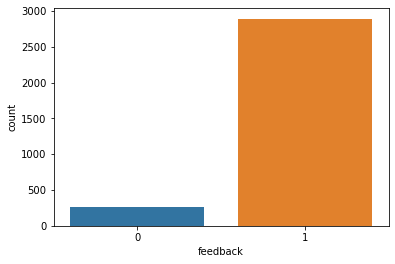

In [9]:
sb.countplot(data=df, x = 'feedback')
plt.show()

In [10]:
#부정리뷰
df.loc[ df['feedback'] == 0, 'feedback'].value_counts()

0    257
Name: feedback, dtype: int64

In [11]:
df['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

# 실습 5. rating 은 0 ~ 5로 되어있습니다. 유저의 별점(rationg) 별 리뷰갯수를 그래프로 나타내세요.

In [12]:
df.head(1)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1


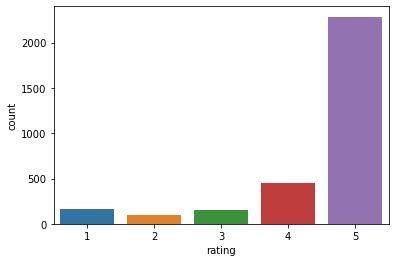

In [13]:
sb.countplot(data=df, x='rating')
plt.show()

value_counts()한 결과 시리즈를 index속성 사용하기

In [14]:
#정렬하기, value_counts()결과 시리즈의 인덱스만 가져오기
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

In [15]:
my_order = df['rating'].value_counts().index

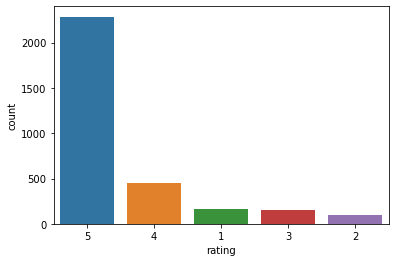

In [16]:
sb.countplot(data=df, x='rating', order=my_order)
plt.show()

# WORD CLOUD 사용하여, 유저들이 어떤 단어를 많이 사용하였는지 시각화 해봅니다. 

# 먼저 WORD CLOUD 를 이용하기 위해서, verified_reviews 를 하나의 문자열로 만들겠습니다.

## 실습 1. verified_reviews 를 하나의 리스트로 만듭니다.

tolist() 컬럼의 문자열만 가져오기

In [17]:
#리스트로 가져오기, 하나의 문자열로 만들어 줌
# tolist()
review_list = df['verified_reviews'].tolist()

## 실습 2. 위의 review_list 리스트를, " " (공백) 으로 합쳐서, 하나의 문자열로 만듭니다.

' '.join('문자열list) 문자열의 공백을 합침

In [18]:
words_as_one_string = ' '.join(review_list)

In [19]:
len(words_as_one_string)

419105

## 실습 3. WordCloud 를 이용하여, 화면에 많이 나온 단어들을 시각화 합니다.

from wordcloud import WordCloud

In [20]:
from wordcloud import WordCloud

In [21]:
data = WordCloud().generate(words_as_one_string)

imshow() 워드클라우드 이용해서 이미지 그리기

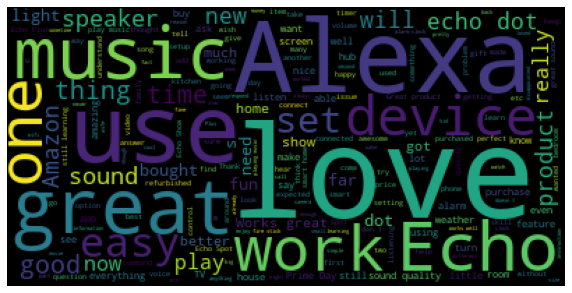

In [22]:
#image show
#imshow()
# plt.axis('off') ---> 좌표 없애기
plt.figure(figsize= (10,8))
plt.imshow(data)
plt.axis('off')
plt.show()

## 실습 4. Data Cleaning 과 Feature Engineering

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vectorizer = CountVectorizer()

In [25]:
alexa_countvectorizer = vectorizer.fit_transform( df['verified_reviews'] )

In [26]:
# 가장 기본적이면서 무식한 방법
# 문자열을 컴퓨터가 처리를 못해서 숫자로 바꿔줘야 함
# 문자의 단어가 중요
# 그래서 단어를 숫자로 바꿔야 함
# 단어 사이를 공백으로 분리해서 단어 별로 정렬 (by= abc순) 한 다음에 숫자로 인덱스를 매겨준다
# 하지만 이런식으로 하면 비슷한 단어, 반대 단어를 구별 할 수가 없다

In [27]:
#벡터: 크기와 방향을 가진 것
# 컬럼을 만들어서 비슷한 단어에 숫자를 매김
#예:
# love loved my Echo it sometimes while playing a game
# 1     0    0  0     0  0          0    0      0  0
# 0     1    0  0     0  0          0    0      0  0
#이런식으로 단어별로 컬럼을 만들어서 숫자를 매김

In [28]:
#vectorizer() 그런 역활을 함

In [29]:
alexa_countvectorizer.shape

(3150, 4044)

In [30]:
df['verified_reviews'].shape

(3150,)

In [31]:
len(vectorizer.get_feature_names())

4044

In [32]:
#toarray()
# 
alexa_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
alexa_countvectorizer.toarray().shape

(3150, 4044)

In [34]:
alexa_countvectorizer.toarray()[0, ]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
word_count_array = alexa_countvectorizer.toarray()

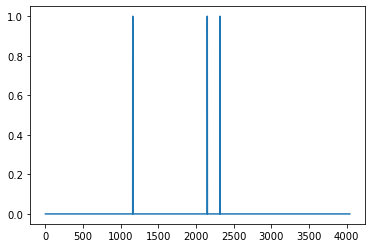

In [36]:
# 첫번째 리뷰
plt.plot(word_count_array[0, :  ] )
plt.show()

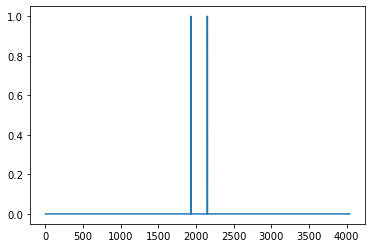

In [37]:
# 2번째 리뷰
plt.plot(word_count_array[1, :  ] )
plt.show()

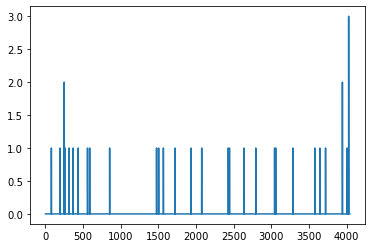

In [38]:
# 3번째 리뷰
plt.plot(word_count_array[2, :  ] )
plt.show()

In [39]:
# 3번째 리뷰
df['verified_reviews'][2]

'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'

In [40]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [41]:
# 'length' 새로운 컬럼을 만들고, 각 리뷰의 글자수를 저장하세요

In [42]:
df['length'] = df['verified_reviews'].apply(len)

In [43]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [44]:
#단어 개수 구하기
# 위의 word_count_array를 구한 것을 참고 

df['word_length'] = word_count_array.sum(axis = 1)

In [45]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,word_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,35
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,30
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1


In [46]:
# 글자수(length)와 rating의 관계를 시각화 하시오

In [47]:
df.describe()

,rating,feedback,length,word_length
count,3150.000000,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524,23.852698
std,1.068506,0.273778,182.099952,32.621630
min,1.000000,0.000000,1.000000,0.000000
25%,4.000000,1.000000,30.000000,5.000000
50%,5.000000,1.000000,74.000000,13.000000
75%,5.000000,1.000000,165.000000,30.000000
max,5.000000,1.000000,2851.000000,517.000000


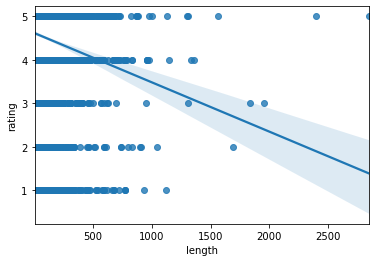

In [48]:
sb.regplot(data=df, x='length', y='rating')
plt.show()

In [49]:
#sb.hist2d()는 dataFrame의 모든 수를 보고 싶을 때

plt.pist2d()

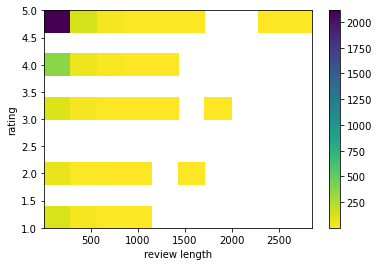

In [50]:
# 2개의 컬럼의 관계를 보고 싶을 때
plt.hist2d(data=df, x='length', y='rating', cmin=0.5, cmap='viridis_r')
plt.xlabel('review length')
plt.ylabel('rating')
plt.colorbar()
plt.show()

In [51]:
df[['rating', 'length']].corr()

,rating,length
rating,1.000000,-0.193067
length,-0.193067,1.000000


df.plot() 컬럼의 숫자데이터 차트

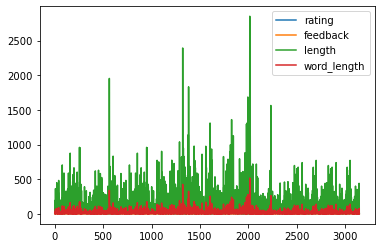

In [52]:
# 컬럼의 숫자데이터만 차트 그림
df.plot()
plt.show()

DataFrame[컬럼].hist() 그리기

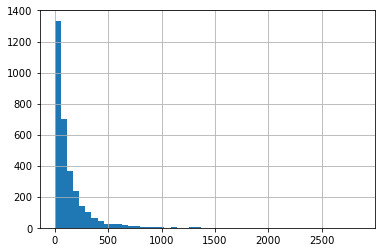

In [54]:
df['length'].hist(bins=50)
plt.show()

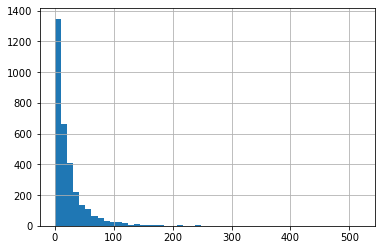

In [55]:
df['word_length'].hist(bins=50)
plt.show()

In [ ]:
# 글자수가 1인 리뷰 데이터를 찾고
# 글자수 가장 길게 쓴 리뷰 데이터를 찾기

In [56]:
df.head()

,rating,date,variation,verified_reviews,feedback,length,word_length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,3
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,2
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,35
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,30
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,1


In [59]:
df.loc[ df['length'] == 1, ]


,rating,date,variation,verified_reviews,feedback,length,word_length
60,5,30-Jul-18,Heather Gray Fabric,😍,1,1,0
85,5,30-Jul-18,Heather Gray Fabric,,1,1,0
183,3,29-Jul-18,Heather Gray Fabric,,1,1,0
219,5,29-Jul-18,Sandstone Fabric,,1,1,0
374,1,26-Jul-18,Black,,0,1,0
...,...,...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1,1,0
3120,5,30-Jul-18,Black Dot,,1,1,0
3123,4,30-Jul-18,Black Dot,,1,1,0
3126,5,30-Jul-18,Black Dot,,1,1,0


In [81]:
# min()메서드 활용
df.loc[ df['length'].min() == df['length'], ]

,rating,date,variation,verified_reviews,feedback,length,word_length
60,5,30-Jul-18,Heather Gray Fabric,😍,1,1,0
85,5,30-Jul-18,Heather Gray Fabric,,1,1,0
183,3,29-Jul-18,Heather Gray Fabric,,1,1,0
219,5,29-Jul-18,Sandstone Fabric,,1,1,0
374,1,26-Jul-18,Black,,0,1,0
...,...,...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1,1,0
3120,5,30-Jul-18,Black Dot,,1,1,0
3123,4,30-Jul-18,Black Dot,,1,1,0
3126,5,30-Jul-18,Black Dot,,1,1,0


In [64]:
longest_review = df.loc [ df['length'] == df['length'].max() , ]

In [69]:
longest_review.iloc[0, 3]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [70]:
df.loc [ df['length'] == df['length'].max() , ].values

array([[5, '20-Jul-18', 'Black  Plus',
        "Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without 

In [78]:
# 또는 인덱스 속성으로 받아와서 loc[]로 열기
max_index = df.loc [ df['length'] == df['length'].max() , ].index[0]

In [79]:
print(df['verified_reviews'][max_index])

Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phil

# GREAT JOB